Crea i singoli file json che vengono poi letti da Gretel  
-> RUN IN EEG_3 ENVIRONMENT

In [ ]:
# Vedere se funziona con SIENA dataset

In [10]:
from EEG_utils.EEG_utils import *

In [11]:
root_folder = "C:\\Users\\zanno\\physionet.org\\files\\chbmit\\1.0.0\\"

# observations = ["chb01_03", "chb01_04", "chb01_15", "chb01_16", "chb01_18", "chb01_21", "chb01_26"]
# observations = ["chb02_16", "chb02_19"]
# observations = ["chb03_01", "chb03_02", "chb03_03", "chb03_04", "chb03_34", "chb03_35", "chb03_36"]
# observations = ["chb04_28", "chb04_08"]
# observations = ["chb05_06", "chb05_13", "chb05_16", "chb05_17", "chb05_22"]
# observations = ["chb06_01", "chb06_04", "chb06_09", "chb06_10", "chb06_13", "chb06_18", "chb06_24"]

# observations = ["chb01_03", "chb01_04", "chb01_15", "chb02_16", "chb02_19", "chb03_01", "chb03_02", "chb03_03", "chb04_28", "chb04_08"]


patient_id = "chb06"
record_id = "04"

num_points = 50

Extracting data...
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb06\chb06_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:156: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


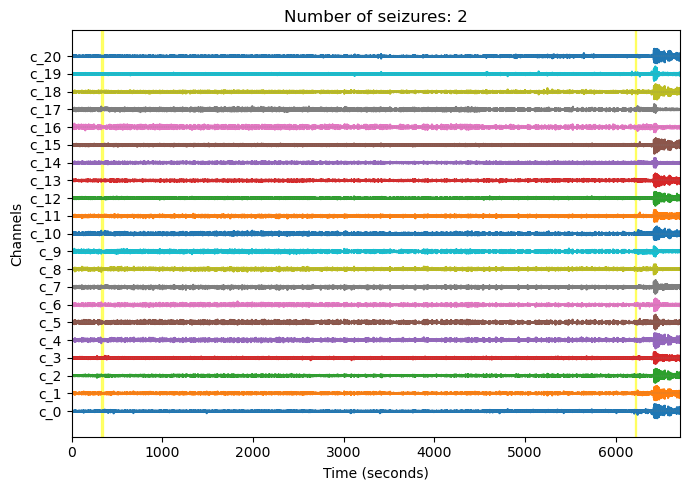

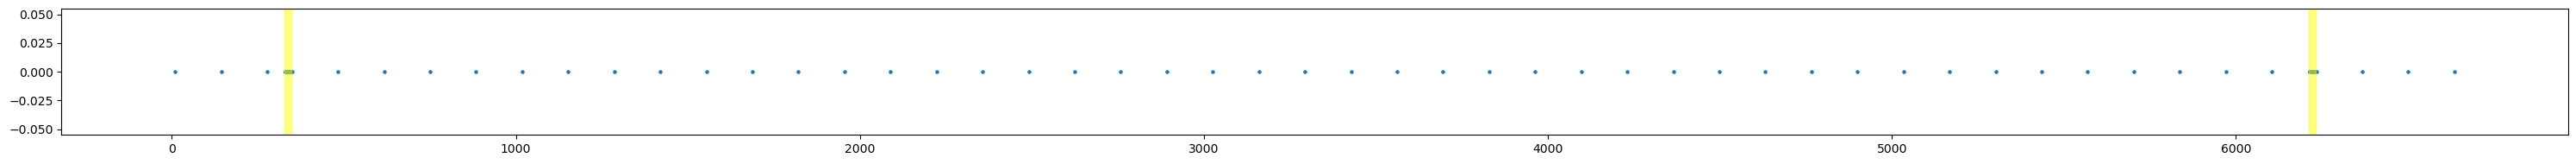

Creating graphs...
k: 2560 ---> t: 10.0 (seizure class: 0)
k: 36823 ---> t: 143.83984375 (seizure class: 0)
k: 71086 ---> t: 277.6796875 (seizure class: 0)
k: 84224 ---> t: 329.0 (seizure class: 1)
k: 84387 ---> t: 329.63671875 (seizure class: 1)
k: 84550 ---> t: 330.2734375 (seizure class: 1)
k: 84713 ---> t: 330.91015625 (seizure class: 1)
k: 84876 ---> t: 331.546875 (seizure class: 1)
k: 85039 ---> t: 332.18359375 (seizure class: 1)
k: 85202 ---> t: 332.8203125 (seizure class: 1)
k: 85365 ---> t: 333.45703125 (seizure class: 1)
k: 85528 ---> t: 334.09375 (seizure class: 1)
k: 85691 ---> t: 334.73046875 (seizure class: 1)
k: 85854 ---> t: 335.3671875 (seizure class: 1)
k: 86017 ---> t: 336.00390625 (seizure class: 1)
k: 86180 ---> t: 336.640625 (seizure class: 1)
k: 86343 ---> t: 337.27734375 (seizure class: 1)
k: 86506 ---> t: 337.9140625 (seizure class: 1)
k: 86669 ---> t: 338.55078125 (seizure class: 1)
k: 86832 ---> t: 339.1875 (seizure class: 1)
k: 86995 ---> t: 339.82421875 (se

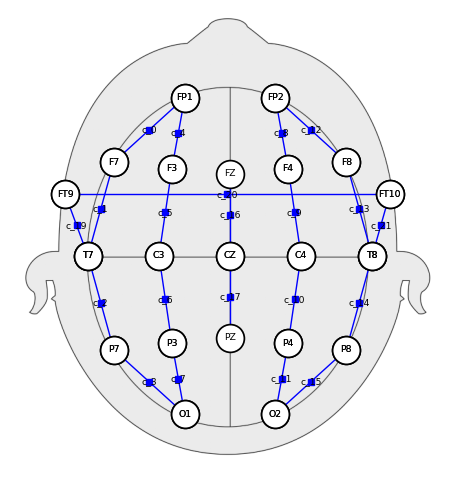

In [12]:
# Create patient
patient = Patient(FilePatient(root_folder, patient_id, record_id), num_points=num_points, num_node_features=3)

# Extract data
print('Extracting data...')
patient.extract_seizure_info()      # Extracting seizure information
patient.load_data()                 # Loading EEG data
patient.plot_signals()              # Plotting the signals with seizures highlighted

# Compute indices
patient.compute_indices()           # Performing sliding window correlation
patient.plot_indices()              # I can also do patient.plot_indices(xlim=(600,900))

# Create graph
print('Creating graphs...')
export_data_to_GRETEL(patient)      # Create graphs for GRETEL

print('Calculating nodes\' coordinates...')
export_coordinates(patient)         # Export coordinates

# __________________________________________________________________________

In [13]:
import datetime

now = datetime.datetime.now()
print("Ultima esecuzione completa:", now.strftime("%d/%m/%Y, ore %H:%M"))

Ultima esecuzione completa: 14/03/2025, ore 08:29


In [14]:
import winsound

winsound.Beep(440, 500)
winsound.Beep(400, 500)
winsound.Beep(440, 500)